In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 72kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=5ee68039ae948979434d193db0d039e59dace9b0e381619b4e9815b020f89e52
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
import cv2
import os
import face_recognition
from google.colab.patches import cv2_imshow

In [3]:
# Location or the directory of your known_faces (faces you want to be identified in future)
#location or the directiory of your unknown_faces(testing how your model will generalize in detecting samples)
known_faces_dir = '/content/drive/My Drive/New_ Project/Known_Faces'
unknown_faces_dir = '/content/drive/My Drive/New_ Project/Unknown_Faces'

In [4]:
# Creating a list of the known faces you want to be detected
known_faces_names = []
#The encodings of the known faces to enable the model detect measurements ie distance between eyes or nose and lips etc
known_faces = []
print('loading faces for facial recognition process')
#Creating the list of the images in the directory where the known images are located
for name in os.listdir(known_faces_dir):
  #loading the images to numerical formats for the machine to understand ie to RGB format {255,255,255}
  image = face_recognition.load_image_file(f'{known_faces_dir}/{name}')
  encoded_known_faces = face_recognition.face_encodings(image)[0]
  known_faces.append(encoded_known_faces)
  names = name.split('.')[0]
  known_faces_names.append(names)
  


for names in known_faces_names:
  print(names)
print('faces loaded and ready ')



loading faces for facial recognition process
Majid (2)
Majid (1)
Messi
Messi 6
Messi (2)
Messi (3)
Messi (4)
Messi (5)
Ronaldo (2)
Ronaldo (1)
Ronaldo
Ronaldo
Ronaldo (4)
Ronaldo (3)
Obama (2)
Obama
Elon Musk (1)
Elon Musk (2)
Elon Musk (3)
Elon Musk (4)
Elon Musk
Chuck Norris (5)
Chuck Norris (4)
Chuck Norris (3)
Chuck Norris (2)
Chuck Norris (1)
Chuck Norris
faces loaded and ready 


loading unknown faces
Match Found !  Majid (2)


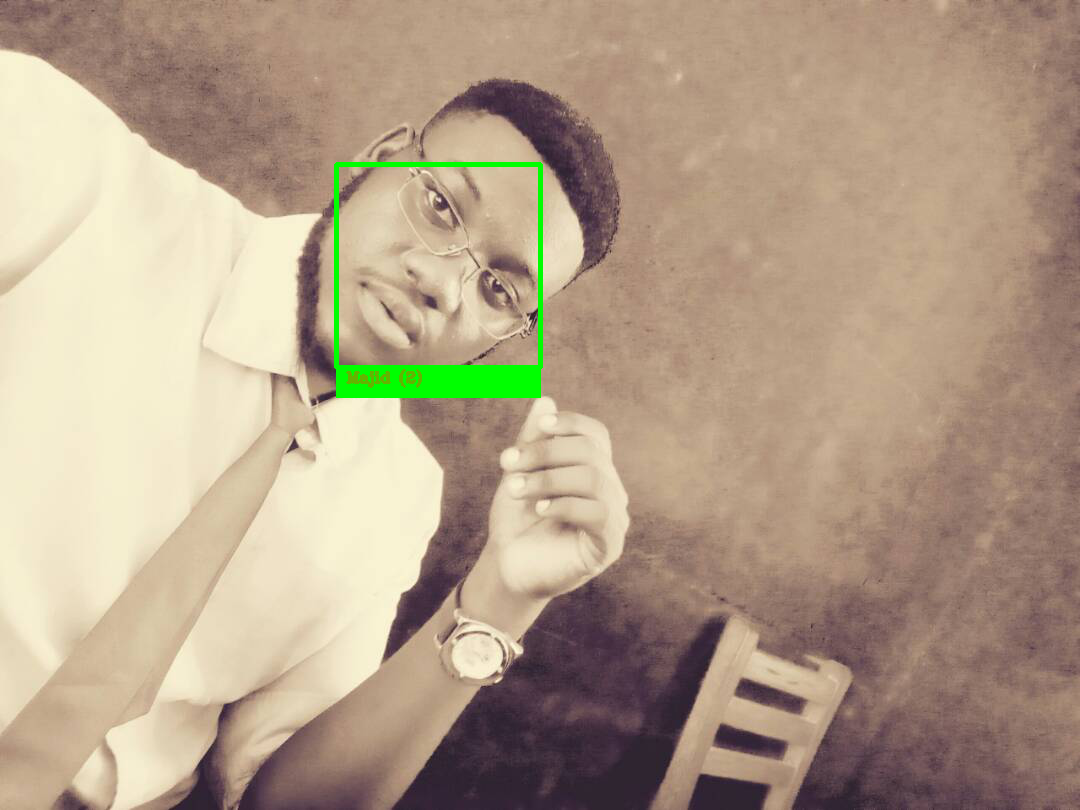

In [ ]:
# Encoding the unknown faces for it to be detected
print('loading unknown faces')
# Creating a list of unknown faces in the directory of the unknown faces
for name in os.listdir(unknown_faces_dir):
  # Loading the unknown_faces in a numerical for or to RGB format (255,255,255)
  image = face_recognition.load_image_file(f'{unknown_faces_dir}/{name}')
  # Detecting the location of the co-ordinates where the detection and measurements will be done
  location = face_recognition.face_locations(image,model='cnn')
  # Encoding it for taking measurements
  encoding = face_recognition.face_encodings(image,location)
  #converting the RGB to the BGR for the CV2 library to identify the image as a coloured image
  image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

  # Creating an encoded unknown_face_image and its location co-ordinates
  for (face_encoding,face_location) in zip (encoding,location):
    #Comparing the known_face (Encoded known_faces) to the unknown_faces
    #face_encoding == encoded_unknown_faces
    results = face_recognition.compare_faces(known_faces,face_encoding)
    match = None
    # if the known_face == unknown_face ie TRUE
    if True in results:
      # match it to the index of results where its TRUE and obtain the names from that index
      match = known_faces_names[results.index(True)]
      print(f'Match Found !  {match}')
      # Taking the exact location  using the list from the LOCATION
      top_left = (face_location[3],face_location[0])
      bottom_right = (face_location[1],face_location[2])
      #note the color is green BGR
      color = [0,255,0]
      frame_thicknness = 3
      # Creating a rectangle boundary using the location to show the detectable region
      cv2.rectangle(image,top_left,bottom_right,color,frame_thicknness)
      # the rectangle for showing the name of the person
      top_left = (face_location[3],face_location[2])
      bottom_right = (face_location[1],face_location[2]+30)
      cv2.rectangle(image,top_left,bottom_right,color,cv2.FILLED)
      # indicating the name of the person on the rectangle created above 
      cv2.putText(image,match,(face_location[3]+10,face_location[2]+15),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,180,100),2)
      #showing the image
      cv2_imshow(image)
      cv2.waitKey(0)
    else:
      match = 'Unknown person'
      top_left = (face_location[3],face_location[0])
      bottom_right = (face_location[1],face_location[2])
      #note the color is green BGR
      color = [0,255,0]
      frame_thicknness = 3
      cv2.rectangle(image,top_left,bottom_right,color,frame_thicknness)
      # the rectangle for wshowing the name of the person
      top_left = (face_location[3],face_location[2])
      bottom_right = (face_location[1],face_location[2]+30)
      cv2.rectangle(image,top_left,bottom_right,color,cv2.FILLED)
      cv2.putText(image,match,(face_location[3]+10,face_location[2]+15),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,180,100),2)
      cv2_imshow(image)
      cv2.waitKey(0)

    

    



In [ ]:
# Note
#it works very well on frontal and slightl frontal images
#Works under small occlusion

# Draw backs
#it does  not detect smal faces ( the minimum size face == 80*80)
# do not work well on side faces
# the bounding box excludes parts of the forehead and sometimes parts of the chin